## Model Bidirectional LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('done')

import yfinance as yf

# Nama saham JP Morgan Chase (JPM)
namasaham = "JPM"

# Mendownload data saham JPM dari Yahoo Finance
saham = yf.download(namasaham, start="2010-01-01", end="2025-04-01")

# Mengambil kolom 'Close' dari DataFrame
saham_close = saham['Close']

# Menampilkan beberapa baris pertama dari harga saham 'Close'
print(saham_close.head())

# Menampilkan jumlah data (panjang data 'Close')
print("Jumlah data 'Close':", len(saham_close))



#Preprocessing data 
#Cek nilai null 
print(saham_close.isnull().sum())

# Menghitung Q1 dan Q3
Q1 = saham_close.quantile(0.25)
Q3 = saham_close.quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menentukan outlier
outliers_iqr = saham_close[(saham_close < lower_bound) | (saham_close > upper_bound)]

print(f"Jumlah data outlier berdasarkan IQR: {len(outliers_iqr)}")
print(f"Outliers: \n{outliers_iqr}")


#Menggunakan histogram dan BoxPlot 
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat figure dengan dua sub-plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Histogram untuk mendeteksi outlier
axes[0].hist(saham_close, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Close Price')
axes[0].set_xlabel('Close Price')
axes[0].set_ylabel('Frequency')

# 2. Boxplot untuk mendeteksi outlier
sns.boxplot(data=saham_close, ax=axes[1], color='skyblue', width=0.4)
axes[1].set_title('Boxplot of Close Price')

# Menampilkan kedua grafik
plt.tight_layout()
plt.show()


#Penanganan outlier data dengan Log transformasi 
import numpy as np

# Log transformation (untuk data yang lebih besar dari 0)
saham_no_outliers_log = np.log(saham_close + 1)  # Menambahkan 1 agar tidak ada nilai log(0)
saham_1 = saham_no_outliers_log 
print("Jumlah baris data:", len(saham_1))
print("jalan")


import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat figure dengan dua sub-plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=300)  # Meningkatkan DPI

# 1. Histogram untuk mendeteksi outlier
axes[0].hist(saham_1, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Close Price', fontsize=14)
axes[0].set_xlabel('Close Price', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# 2. Boxplot untuk mendeteksi outlier
sns.boxplot(data=saham_1, ax=axes[1], color='skyblue', width=0.4)
axes[1].set_title('Boxplot of Close Price', fontsize=14)

# Menampilkan kedua grafik dengan tata letak yang rapih
plt.tight_layout()

# Menampilkan grafik
plt.show()
# Menampilkan kedua grafik dengan tata letak yang rapih
plt.tight_layout()

# Menyimpan gambar ke file
#plt.savefig('histogram_and_boxplot.png', dpi=300)  # Menyimpan file PNG dengan resolusi tinggi


data = saham_1
print(data)


#Tarining set saya rubah menjadi 80%
percent_train = 0.80
trainingset = data.iloc[:int(len(data)*percent_train),:]
testset     = data.iloc[int(len(data)*percent_train):,:]
print("Done")

from sklearn.preprocessing import MinMaxScaler
tc = MinMaxScaler()
trainingset = tc.fit_transform(trainingset)
testset = tc.fit_transform(testset)
print("Done")


def createDataset(data, window):
    dataX, dataY = [], []
    for i in range(len(data)-window):
        temp = []
        for j in range(i, i+window):
            temp.append(data[j,0])
        dataX.append(temp)
        dataY.append(data[i+window,0])
    return np.array(dataX), np.array(dataY)
window = 3
trainX, trainY = createDataset(trainingset, window)
trainX=trainX.reshape(len(trainingset)-window,window,1)     #reshape to 3D
#print(trainX)
#print(trainY)
print('done')

In [30]:
import tensorflow as tf
import tensorflow_estimator
#import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
print('jalan')

jalan


model bidirectional:

In [31]:
# Model
regressor=keras.Sequential()
# hidden layer (4)
regressor.add(Bidirectional(LSTM(units=50,activation='tanh',return_sequences=True,input_shape=(trainX.shape[1],1))))
regressor.add(Dropout(0.2))

regressor.add(Bidirectional(LSTM(units=50, return_sequences=True)))
regressor.add(Dropout(0.2))

regressor.add(Bidirectional(LSTM(units=50, return_sequences=True)))
regressor.add(Dropout(0.2))

regressor.add(Bidirectional(LSTM(units=50)))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))
regressor.compile(optimizer='adam',loss='mean_squared_error') #adam
regressor.fit(trainX,trainY,epochs=10,batch_size=32)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
68/68 [==============================] - 43s 16ms/step - loss: 0.0829
Epoch 2/10
68/68 [==============================] - 1s 17ms/step - loss: 0.0022
Epoch 3/10
68/68 [==============================] - 1s 19ms/step - loss: 0.0015
Epoch 4/10
68/68 [==============================] - 1s 19ms/step - loss: 0.0015
Epoch 5/10
68/68 [==============================] - 1s 19ms/step - loss: 

testX ke 3 dimensi dan testY 1 dimensi:

In [32]:
testX, testY = createDataset(testset, window)   #split x and y
testX=testX.reshape(len(testset)-window,window,1)   #reshape x to 3D
print('Done')

Done


prediksi:

In [33]:
predict_price = regressor.predict(testX)
print('Done')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Done


Denormalisasi testY untuk di plot:

In [34]:
testY=tc.inverse_transform(testY.reshape(-1,1))
predict_price=tc.inverse_transform(predict_price)
trainingset=tc.inverse_transform(trainingset)
testset=tc.inverse_transform(testset)
dfpredict=pd.DataFrame(dict(testY=list(testY),predict=list(predict_price)))
print(dfpredict)

def dstat(x,y):
    dstat = 0
    n = len(y)
    for i in range(n-1):
        if ((x[i+1]-y[i])*(y[i+1]-y[i]))>0 :
            dstat += 1
            Dstat = (float(1/(n-1))*dstat)*100
    return float(Dstat)

print('Dstat = {}%'.format(dstat(testY,predict_price)))


         testY      predict
0    [21225.0]  [21152.303]
1    [21000.0]  [21161.818]
2    [21250.0]  [21110.838]
3    [20875.0]  [21134.953]
4    [20825.0]  [21022.322]
..         ...          ...
925  [33000.0]  [32932.316]
926  [32800.0]  [32942.285]
927  [32450.0]  [33012.387]
928  [32650.0]  [32874.195]
929  [32600.0]  [32759.588]

[930 rows x 2 columns]
Dstat = 69.96770721205596%


In [35]:
def dstat(x,y):
    dstat = 0
    n = len(y)
    for i in range(n-1):
        if ((x[i+1]-y[i])*(y[i+1]-y[i]))>0:
            dstat +=1
            Dstat = (float(1/(n-1))*dstat)*100
    return float(Dstat)

print('skor akurasi = {}%'.format(dstat(testY,predict_price)))       

skor akurasi = 69.4170403587444%


plot hasil testing data prediksi:

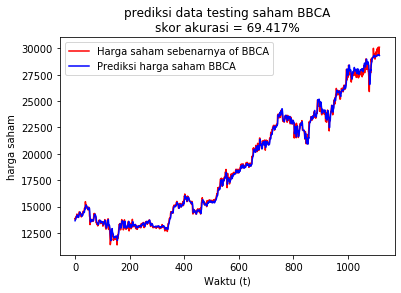

In [36]:
plt.plot(np.arange(len(testY)),testY,color='red',label='Harga saham sebenarnya of {}'.format(namasaham))
# plot predict
plt.plot(np.arange(len(predict_price)),predict_price,color='blue',label='Prediksi harga saham {}'.format(namasaham))
plt.title('prediksi data testing saham {}\nskor akurasi = {}%'.format(namasaham,round(dstat(testY,predict_price),3)))
plt.xlabel('Waktu (t)')
plt.ylabel('harga saham')
plt.legend()
#plt.savefig('E:/Dokument/testing_predict_Bilstm_6_{}.png'.format(namasaham))
plt.show()

In [ ]:
===========================================================

# Model Stacked LSTM:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('done')

done


In [3]:
import yfinance as yf

# Nama saham JP Morgan Chase (JPM)
namasaham = "JPM"

# Mendownload data saham JPM dari Yahoo Finance
saham = yf.download(namasaham, start="2010-01-01", end="2025-04-01", group_by="ticker")

# Memeriksa kolom dan struktur DataFrame untuk memahami apakah menggunakan MultiIndex
print(saham.columns)
print(saham.index)
# Mengambil kolom 'Close' dari MultiIndex, jika memang menggunakan MultiIndex
saham_close = saham[('JPM', 'Close')]
# Menampilkan beberapa data pertama dari harga 'Close'
print(saham_close.head(30))
# Menampilkan jumlah data 'Close'
print("Jumlah data 'Close':", len(saham_close))

,Date,Price,Open,High,Low,Vol.,Change %
0,04/17/2025,231.96,230.80,234.34,230.55,9.56M,1.02%
1,04/16/2025,229.61,232.00,233.58,227.93,9.32M,-1.51%
2,04/15/2025,233.13,236.10,238.65,232.82,10.91M,-0.68%
3,04/14/2025,234.72,237.10,239.78,233.63,13.02M,-0.63%
4,04/11/2025,236.20,226.31,238.57,225.00,20.28M,4.00%


In [2]:
import yfinance as yf

# Nama saham JP Morgan Chase (JPM)
namasaham = "JPM"

# Mendownload data saham JPM dari Yahoo Finance
saham = yf.download(namasaham, start="2010-01-01", end="2025-04-01")

# Mengambil kolom 'Close' dari DataFrame
saham_close = saham['Close']

# Menampilkan beberapa baris pertama dari harga saham 'Close'
print(saham_close.head())

# Menampilkan jumlah data (panjang data 'Close')
print("Jumlah data 'Close':", len(saham_close))


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Ticker            JPM
Date                 
2010-01-04  28.829174
2010-01-05  29.387602
2010-01-06  29.549063
2010-01-07  30.134396
2010-01-08  30.060389
Jumlah data 'Close': 3834


## Preprocessing Data

In [3]:
#Preprocessing data 
#Cek nilai null 
print(saham_close.isnull().sum())

Ticker
JPM    0
dtype: int64


In [4]:
# Menghitung Q1 dan Q3
Q1 = saham_close.quantile(0.25)
Q3 = saham_close.quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menentukan outlier
outliers_iqr = saham_close[(saham_close < lower_bound) | (saham_close > upper_bound)]

print(f"Jumlah data outlier berdasarkan IQR: {len(outliers_iqr)}")
print(f"Outliers: \n{outliers_iqr}")


Jumlah data outlier berdasarkan IQR: 3834
Outliers: 
Ticker             JPM
Date                  
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
...                ...
2025-03-25  249.592636
2025-03-26  249.493240
2025-03-27  246.601044
2025-03-28  241.363327
2025-03-31  243.798325

[3834 rows x 1 columns]


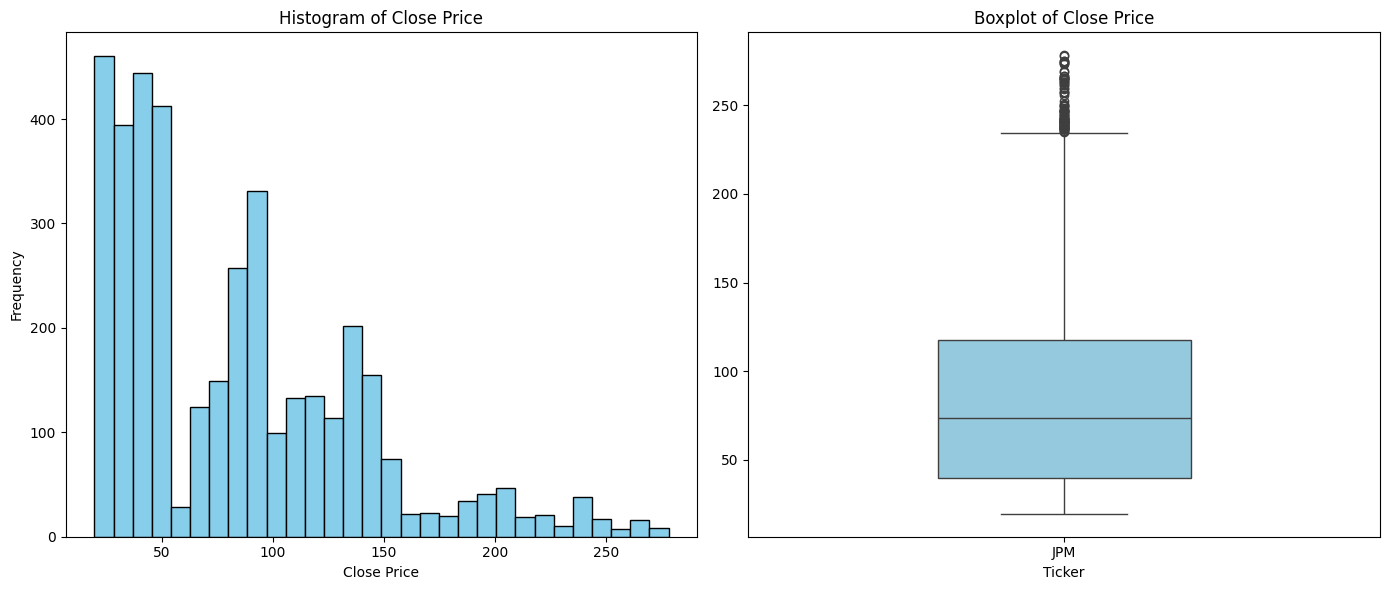

In [5]:
#Menggunakan histogram dan BoxPlot 
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat figure dengan dua sub-plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Histogram untuk mendeteksi outlier
axes[0].hist(saham_close, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Close Price')
axes[0].set_xlabel('Close Price')
axes[0].set_ylabel('Frequency')

# 2. Boxplot untuk mendeteksi outlier
sns.boxplot(data=saham_close, ax=axes[1], color='skyblue', width=0.4)
axes[1].set_title('Boxplot of Close Price')

# Menampilkan kedua grafik
plt.tight_layout()
plt.show()


In [6]:
#Penanganan outlier data dengan Log transformasi 
import numpy as np

# Log transformation (untuk data yang lebih besar dari 0)
saham_no_outliers_log = np.log(saham_close + 1)  # Menambahkan 1 agar tidak ada nilai log(0)
saham_1 = saham_no_outliers_log 
print("Jumlah baris data:", len(saham_1))
print("jalan")

Jumlah baris data: 3834
jalan


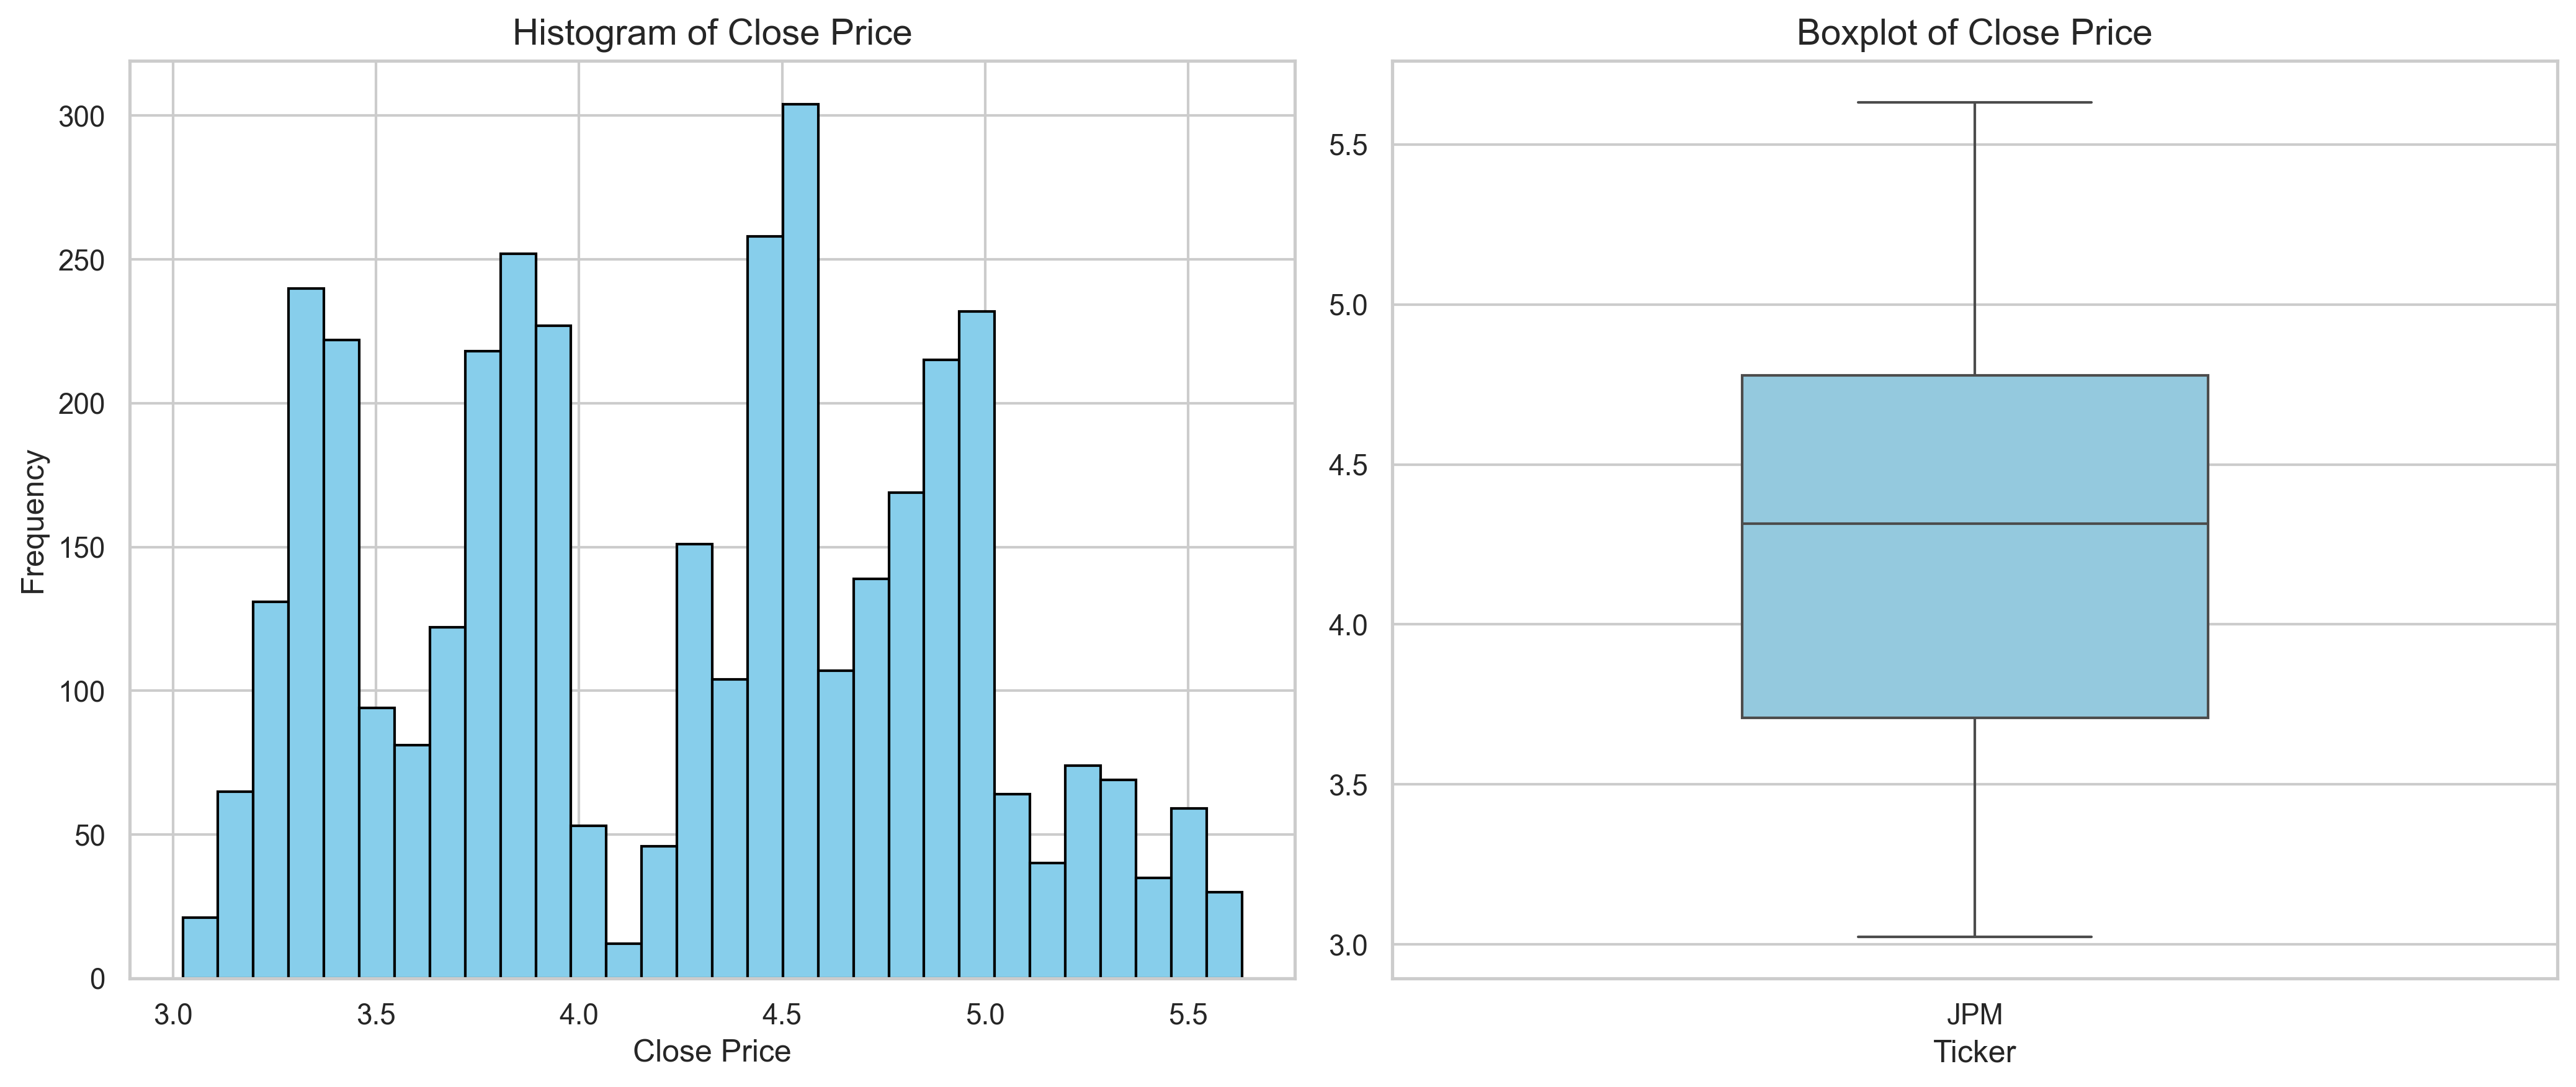

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat figure dengan dua sub-plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=300)  # Meningkatkan DPI

# 1. Histogram untuk mendeteksi outlier
axes[0].hist(saham_1, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Close Price', fontsize=14)
axes[0].set_xlabel('Close Price', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# 2. Boxplot untuk mendeteksi outlier
sns.boxplot(data=saham_1, ax=axes[1], color='skyblue', width=0.4)
axes[1].set_title('Boxplot of Close Price', fontsize=14)

# Menampilkan kedua grafik dengan tata letak yang rapih
plt.tight_layout()

# Menampilkan grafik
plt.show()
# Menampilkan kedua grafik dengan tata letak yang rapih
plt.tight_layout()

# Menyimpan gambar ke file
#plt.savefig('histogram_and_boxplot.png', dpi=300)  # Menyimpan file PNG dengan resolusi tinggi

In [8]:
data = saham_1
print(data)

Ticker           JPM
Date                
2010-01-04  3.395487
2010-01-05  3.414035
2010-01-06  3.419334
2010-01-07  3.438313
2010-01-08  3.435933
...              ...
2025-03-25  5.523829
2025-03-26  5.523432
2025-03-27  5.511819
2025-03-28  5.490438
2025-03-31  5.500435

[3834 rows x 1 columns]


In [9]:
#Tarining set saya rubah menjadi 80%
percent_train = 0.80
trainingset = data.iloc[:int(len(data)*percent_train),:]
testset     = data.iloc[int(len(data)*percent_train):,:]
print("Done")

Done


#### normalisasi data (scalling) antara 0 , 1 pada dataset dengan MinMaxScaler (Feature Scaling)


In [10]:
from sklearn.preprocessing import MinMaxScaler
tc = MinMaxScaler()
trainingset = tc.fit_transform(trainingset)
testset = tc.fit_transform(testset)
print("Done")


Done


#### membuat trainX, trainY, testX dan testY (dengan window=3) (splitting dataset)



In [11]:
def createDataset(data, window):
    dataX, dataY = [], []
    for i in range(len(data)-window):
        temp = []
        for j in range(i, i+window):
            temp.append(data[j,0])
        dataX.append(temp)
        dataY.append(data[i+window,0])
    return np.array(dataX), np.array(dataY)
window = 3
trainX, trainY = createDataset(trainingset, window)
trainX=trainX.reshape(len(trainingset)-window,window,1)     #reshape to 3D
#print(trainX)
#print(trainY)
print('done')

done



### Masuk model Stacked LSTM

In [12]:
import tensorflow as tf
import tensorflow_estimator
#import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
print('jalan')

jalan


Epoch 1/2000
96/96 [==============================] - 18s 26ms/step - loss: 0.0696
Epoch 2/2000
96/96 [==============================] - 3s 26ms/step - loss: 0.0053
Epoch 3/2000
96/96 [==============================] - 2s 26ms/step - loss: 0.0038
Epoch 4/2000
96/96 [==============================] - 2s 25ms/step - loss: 0.0031
Epoch 5/2000
96/96 [==============================] - 2s 26ms/step - loss: 0.0029
Epoch 6/2000
96/96 [==============================] - 3s 26ms/step - loss: 0.0026
Epoch 7/2000
96/96 [==============================] - 2s 25ms/step - loss: 0.0025
Epoch 8/2000
96/96 [==============================] - 2s 25ms/step - loss: 0.0025
Epoch 9/2000
96/96 [==============================] - 2s 26ms/step - loss: 0.0023
Epoch 10/2000
96/96 [==============================] - 2s 26ms/step - loss: 0.0022
Epoch 11/2000
96/96 [==============================] - 3s 27ms/step - loss: 0.0021
Epoch 12/2000
96/96 [==============================] - 2s 25ms/step - loss: 0.0021
Epoch 13/200

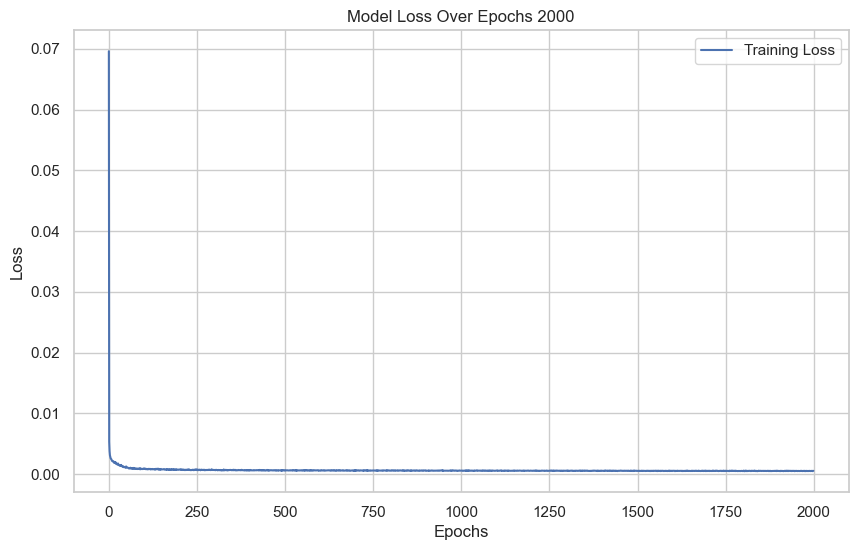

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Model Stacked LSTM
regressor = Sequential()

# Menambahkan lapisan LSTM pertama
regressor.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(trainX.shape[1], 1)))
regressor.add(Dropout(0.2))  # Dropout untuk menghindari overfitting

# Menambahkan lapisan LSTM kedua
regressor.add(LSTM(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

# Menambahkan lapisan LSTM ketiga
regressor.add(LSTM(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

# Menambahkan lapisan LSTM keempat (lapisan terakhir tanpa return_sequences)
regressor.add(LSTM(units=50, activation='tanh'))
regressor.add(Dropout(0.2))

# Lapisan output
regressor.add(Dense(units=1))  # Output tunggal untuk prediksi harga saham

# Kompilasi model
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
#regressor.fit(trainX, trainY, epochs=10, batch_size=32)
# Train the model and store the training history
history = regressor.fit(trainX, trainY, epochs=2000, batch_size=32)

# Plotting the loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss Over Epochs 2000')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend()  # Show legend
plt.grid(True)  # Enable grid for better readability
plt.show()  # Display the plot

In [14]:
testX, testY = createDataset(testset, window)   #split x and y
testX=testX.reshape(len(testset)-window,window,1)   #reshape x to 3D
print('Done')

Done


In [15]:
predict_price = regressor.predict(testX)
print('Done')

24/24 [==============================] - 7s 10ms/step
Done


In [16]:
# Menghitung RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(testY.flatten(), predict_price.flatten()))
print(f"RMSE: {rmse}")

# Menghitung MSE
mse = mean_squared_error(testY.flatten(), predict_price.flatten())
print(f"MSE: {mse}")

RMSE: 0.01664325264573752
MSE: 0.000276997858629849


In [17]:
testY=tc.inverse_transform(testY.reshape(-1,1))
predict_price=tc.inverse_transform(predict_price)
trainingset=tc.inverse_transform(trainingset)
testset=tc.inverse_transform(testset)
dfpredict=pd.DataFrame(dict(testY=list(testY),predict=list(predict_price)))
print(dfpredict)

def dstat(x,y):
    dstat= 0
    n = len(y)
    for i in range(n-1):
        if ((x[i+1]-y[i])*(y[i+1]-y[i]))>0 :
            dstat += 1
            Dstat = (float(1/(n-1))*dstat)*100
    return float(Dstat)

print('Dstat = {}%'.format(dstat(testY,predict_price)))



                    testY      predict
0    [4.8052892836472365]   [4.793509]
1     [4.848655542611262]  [4.8065114]
2     [4.861122854924025]  [4.8455315]
3    [4.8607688739577934]  [4.8608036]
4     [4.857576623400752]   [4.866771]
..                    ...          ...
759   [5.523828656987914]   [5.481619]
760    [5.52343193555582]   [5.495098]
761  [5.5118187560728495]   [5.503121]
762    [5.49043795160415]  [5.4995136]
763   [5.500434706599068]  [5.4874387]

[764 rows x 2 columns]
Dstat = 74.83617300131061%


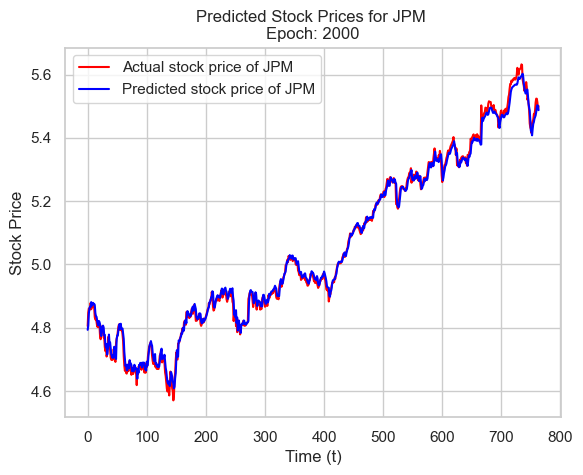

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the actual stock prices
plt.plot(np.arange(len(testY)), testY, color='red', label='Actual stock price of {}'.format(namasaham))

# Plotting the predicted stock prices
plt.plot(np.arange(len(predict_price)), predict_price, color='blue', label='Predicted stock price of {}'.format(namasaham))

# Adding title and labels to the plot
plt.title('Predicted Stock Prices for {} \nEpoch: 2000'.format(namasaham))  # Added epoch here
plt.xlabel('Time (t)')
plt.ylabel('Stock Price')

# Adding a legend to differentiate between actual and predicted prices
plt.legend()

# Saving the plot with high resolution (sharp image)
# plt.savefig('E:/Dokument/testing_predict_Rnn_6_{}.png'.format(namasaham), dpi=300, bbox_inches='tight')

# Displaying the plot
plt.show()


# Model  Deep RNN:

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('done')

done


In [4]:
import yfinance as yf

# Nama saham JP Morgan Chase (JPM)
namasaham = "JPM"

# Mendownload data saham JPM dari Yahoo Finance
saham = yf.download(namasaham, start="2010-01-01", end="2025-04-01", group_by="ticker")

# Memeriksa kolom dan struktur DataFrame untuk memahami apakah menggunakan MultiIndex
print(saham.columns)
print(saham.index)
# Mengambil kolom 'Close' dari MultiIndex, jika memang menggunakan MultiIndex
saham_close = saham[('JPM', 'Close')]
# Menampilkan beberapa data pertama dari harga 'Close'
print(saham_close.head(30))
# Menampilkan jumlah data 'Close'
print("Jumlah data 'Close':", len(saham_close))

ModuleNotFoundError: No module named 'yfinance'

In [36]:
import yfinance as yf

# Nama saham JP Morgan Chase (JPM)
namasaham = "JPM"

# Mendownload data saham JPM dari Yahoo Finance
saham = yf.download(namasaham, start="2010-01-01", end="2025-04-01")

# Mengambil kolom 'Close' dari DataFrame
saham_close = saham['Close']

# Menampilkan beberapa baris pertama dari harga saham 'Close'
print(saham_close.head())

# Menampilkan jumlah data (panjang data 'Close')
print("Jumlah data 'Close':", len(saham_close))


[*********************100%***********************]  1 of 1 completed

Ticker            JPM
Date                 
2010-01-04  28.829182
2010-01-05  29.387606
2010-01-06  29.549061
2010-01-07  30.134399
2010-01-08  30.060398
Jumlah data 'Close': 3834


## Preprocessing Data

In [37]:
#Preprocessing data 
#Cek nilai null 
print(saham_close.isnull().sum())

Ticker
JPM    0
dtype: int64


In [38]:
# Menghitung Q1 dan Q3
Q1 = saham_close.quantile(0.25)
Q3 = saham_close.quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menentukan outlier
outliers_iqr = saham_close[(saham_close < lower_bound) | (saham_close > upper_bound)]

print(f"Jumlah data outlier berdasarkan IQR: {len(outliers_iqr)}")
print(f"Outliers: \n{outliers_iqr}")


Jumlah data outlier berdasarkan IQR: 3834
Outliers: 
Ticker             JPM
Date                  
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
...                ...
2025-03-25  249.592636
2025-03-26  249.493240
2025-03-27  246.601044
2025-03-28  241.363327
2025-03-31  243.798325

[3834 rows x 1 columns]


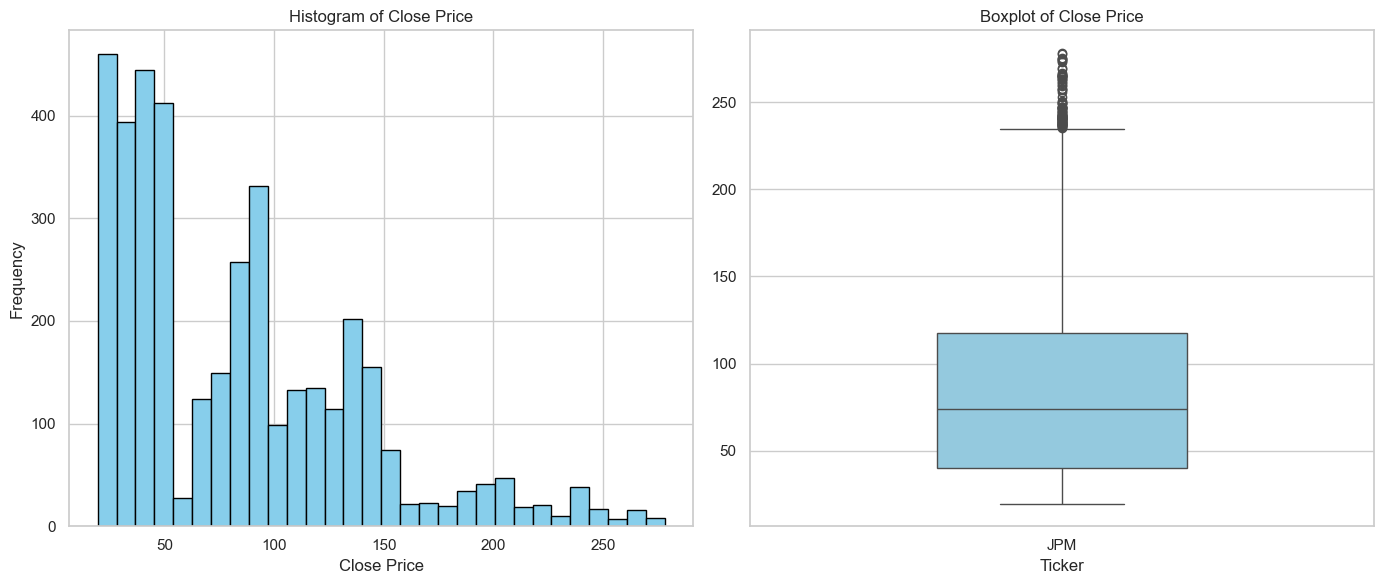

In [39]:
#Menggunakan histogram dan BoxPlot 
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat figure dengan dua sub-plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Histogram untuk mendeteksi outlier
axes[0].hist(saham_close, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Close Price')
axes[0].set_xlabel('Close Price')
axes[0].set_ylabel('Frequency')

# 2. Boxplot untuk mendeteksi outlier
sns.boxplot(data=saham_close, ax=axes[1], color='skyblue', width=0.4)
axes[1].set_title('Boxplot of Close Price')

# Menampilkan kedua grafik
plt.tight_layout()
plt.show()


In [40]:
#Penanganan outlier data dengan Log transformasi 
import numpy as np

# Log transformation (untuk data yang lebih besar dari 0)
saham_no_outliers_log = np.log(saham_close + 1)  # Menambahkan 1 agar tidak ada nilai log(0)
saham_1 = saham_no_outliers_log 
print("Jumlah baris data:", len(saham_1))
print("jalan")

Jumlah baris data: 3834
jalan


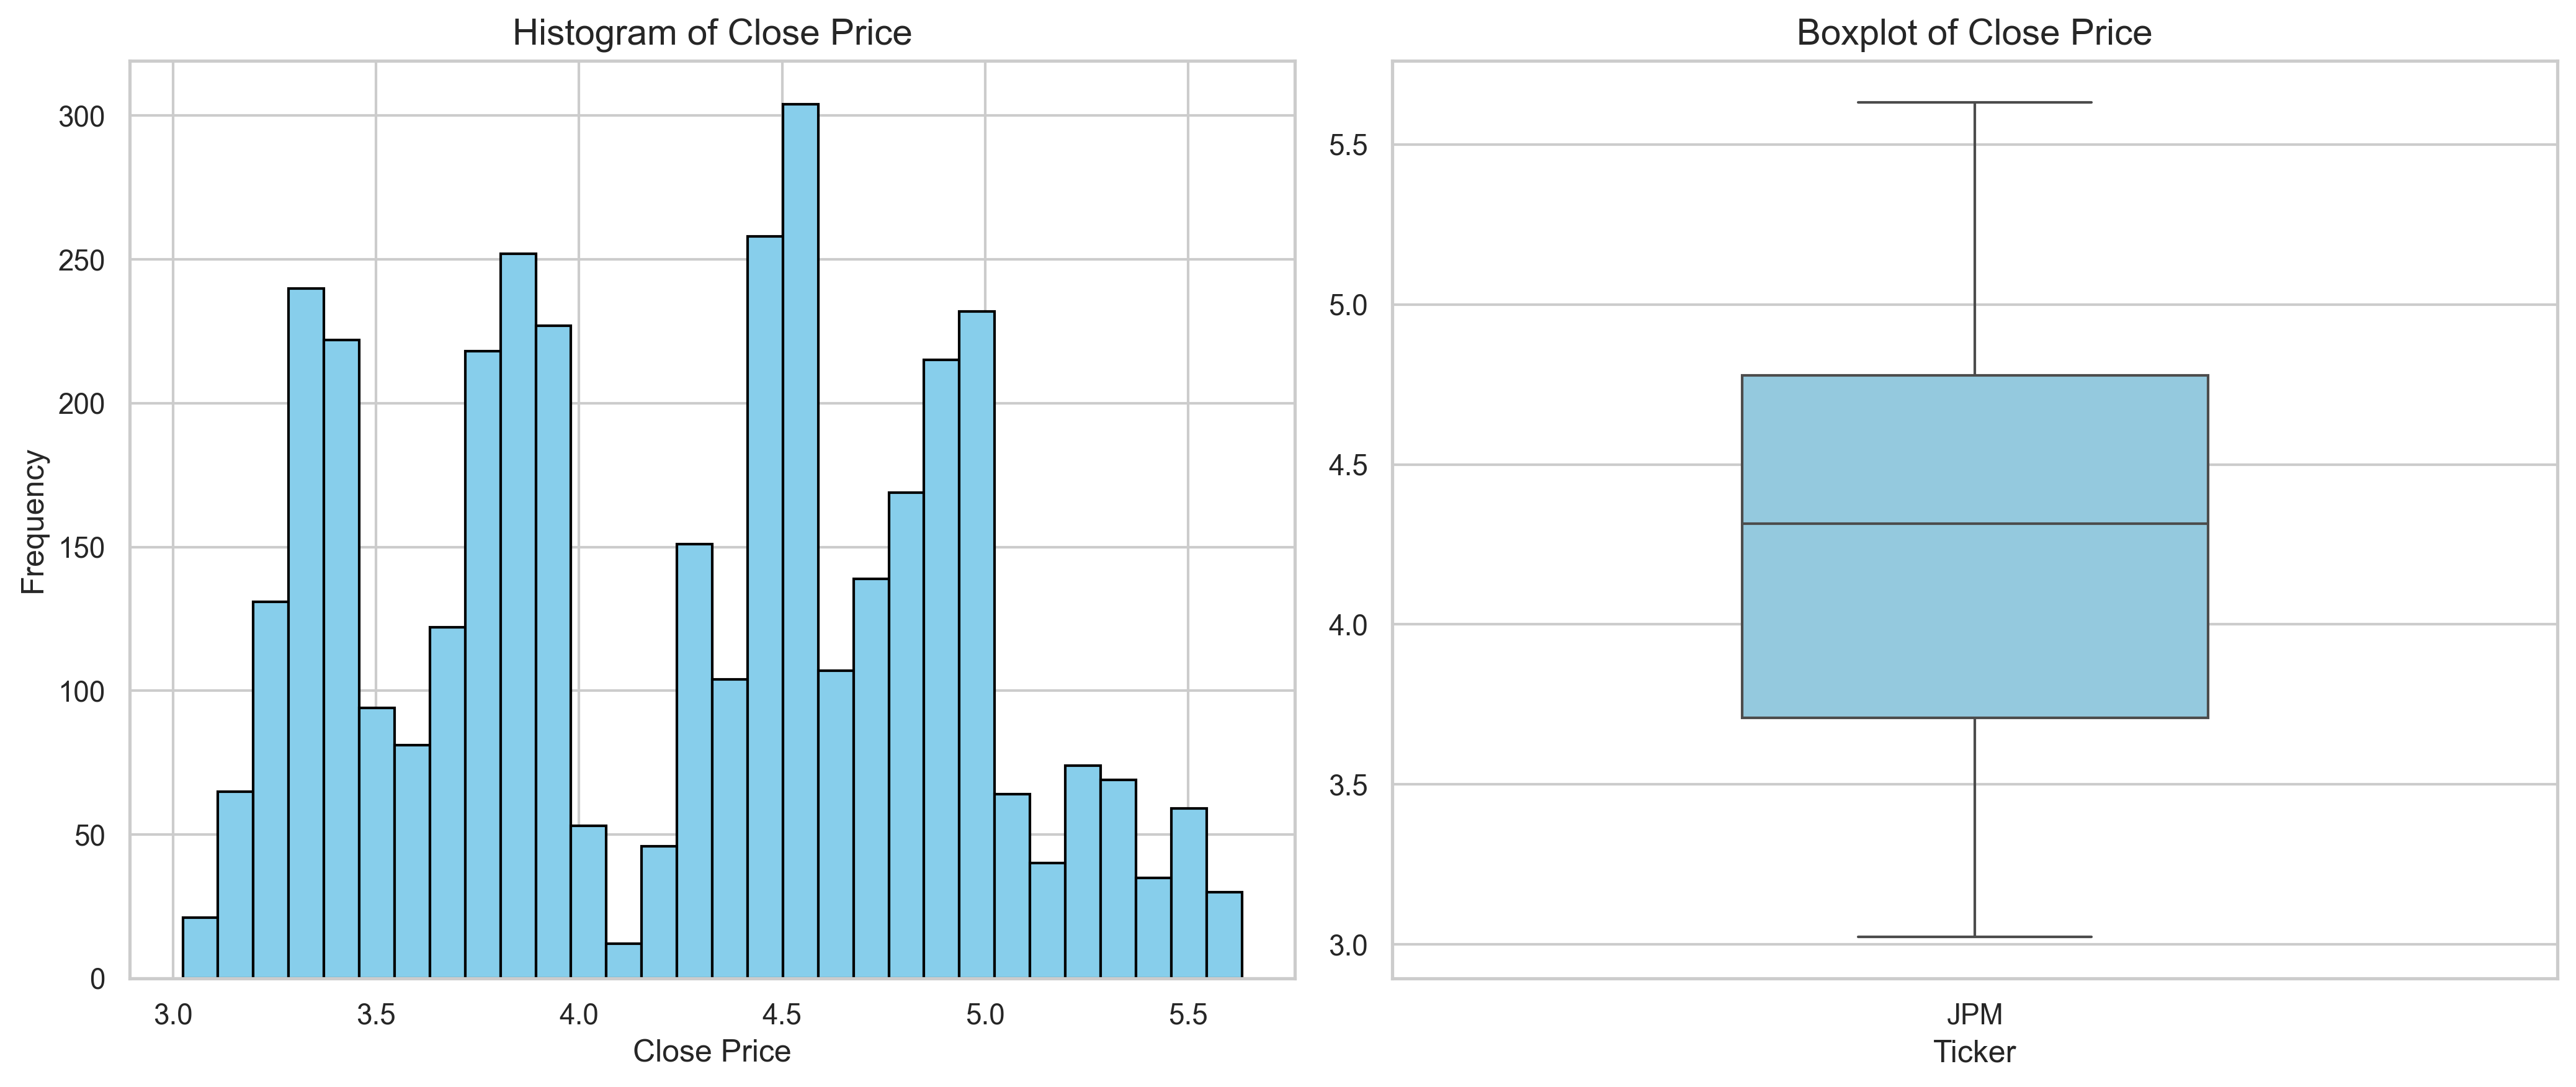

<Figure size 640x480 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat figure dengan dua sub-plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=300)  # Meningkatkan DPI

# 1. Histogram untuk mendeteksi outlier
axes[0].hist(saham_1, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Close Price', fontsize=14)
axes[0].set_xlabel('Close Price', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# 2. Boxplot untuk mendeteksi outlier
sns.boxplot(data=saham_1, ax=axes[1], color='skyblue', width=0.4)
axes[1].set_title('Boxplot of Close Price', fontsize=14)

# Menampilkan kedua grafik dengan tata letak yang rapih
plt.tight_layout()

# Menampilkan grafik
plt.show()
# Menampilkan kedua grafik dengan tata letak yang rapih
plt.tight_layout()

# Menyimpan gambar ke file
#plt.savefig('histogram_and_boxplot.png', dpi=300)  # Menyimpan file PNG dengan resolusi tinggi

In [42]:
data = saham_1
print(data)

Ticker           JPM
Date                
2010-01-04  3.395487
2010-01-05  3.414035
2010-01-06  3.419334
2010-01-07  3.438313
2010-01-08  3.435934
...              ...
2025-03-25  5.523829
2025-03-26  5.523432
2025-03-27  5.511819
2025-03-28  5.490438
2025-03-31  5.500435

[3834 rows x 1 columns]


In [43]:
#Tarining set saya rubah menjadi 80%
percent_train = 0.80
trainingset = data.iloc[:int(len(data)*percent_train),:]
testset     = data.iloc[int(len(data)*percent_train):,:]
print("Done")

Done


#### normalisasi data (scalling) antara 0 , 1 pada dataset dengan MinMaxScaler (Feature Scaling)

In [44]:
from sklearn.preprocessing import MinMaxScaler
tc = MinMaxScaler()
trainingset = tc.fit_transform(trainingset)
testset = tc.fit_transform(testset)
print("Done")


Done


#### membuat trainX, trainY, testX dan testY (dengan window=3) (splitting dataset)

In [45]:
def createDataset(data, window):
    dataX, dataY = [], []
    for i in range(len(data)-window):
        temp = []
        for j in range(i, i+window):
            temp.append(data[j,0])
        dataX.append(temp)
        dataY.append(data[i+window,0])
    return np.array(dataX), np.array(dataY)
window = 3
trainX, trainY = createDataset(trainingset, window)
trainX=trainX.reshape(len(trainingset)-window,window,1)     #reshape to 3D
#print(trainX)
#print(trainY)
print('done')

done


### Masuk model Deep RNN

In [46]:
import tensorflow as tf
#import tensorflow_estimator
#import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
print('jalan')

jalan


Epoch 1/2000
96/96 [==============================] - 10s 16ms/step - loss: 0.0946
Epoch 2/2000
96/96 [==============================] - 2s 17ms/step - loss: 0.0266
Epoch 3/2000
96/96 [==============================] - 2s 16ms/step - loss: 0.0182
Epoch 4/2000
96/96 [==============================] - 2s 16ms/step - loss: 0.0127
Epoch 5/2000
96/96 [==============================] - 2s 16ms/step - loss: 0.0101
Epoch 6/2000
96/96 [==============================] - 2s 16ms/step - loss: 0.0083
Epoch 7/2000
96/96 [==============================] - 2s 16ms/step - loss: 0.0073
Epoch 8/2000
96/96 [==============================] - 2s 16ms/step - loss: 0.0059
Epoch 9/2000
96/96 [==============================] - 2s 16ms/step - loss: 0.0055
Epoch 10/2000
96/96 [==============================] - 2s 16ms/step - loss: 0.0051
Epoch 11/2000
96/96 [==============================] - 2s 17ms/step - loss: 0.0045
Epoch 12/2000
96/96 [==============================] - 2s 16ms/step - loss: 0.0044
Epoch 13/200

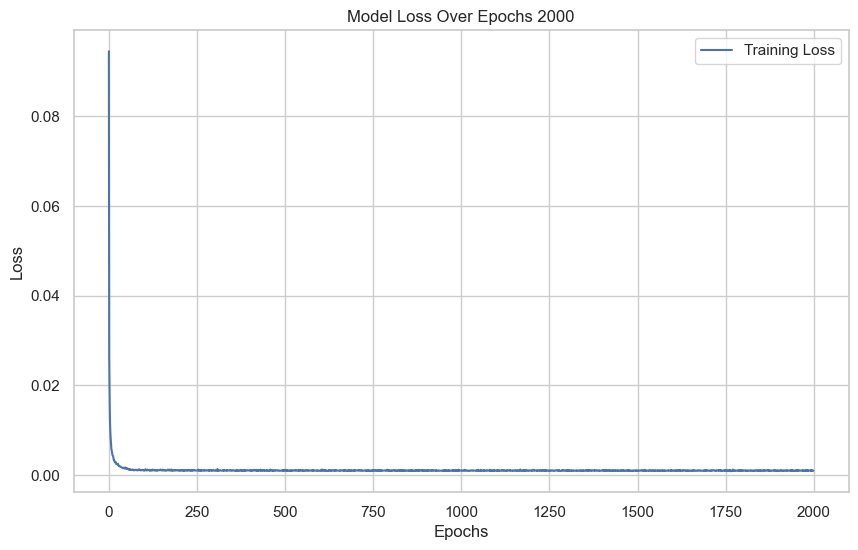

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
# Deep RNN model
regressor = Sequential()

# Adding the first RNN layer
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(trainX.shape[1], 1)))
regressor.add(Dropout(0.2))  # Dropout to prevent overfitting

# Adding the second RNN layer
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the third RNN layer
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the fourth RNN layer (final layer without return_sequences)
regressor.add(SimpleRNN(units=50, activation='tanh'))
regressor.add(Dropout(0.2))

# Output layer
regressor.add(Dense(units=1))  # Single output for stock price prediction

# Compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and store the training history
history = regressor.fit(trainX, trainY, epochs=2000, batch_size=32)

# Plotting the loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss Over Epochs 2000')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend()  # Show legend
plt.grid(True)  # Enable grid for better readability
plt.show()  # Display the plot

##### testX ke 3 dimensi dan testY 1 dimensi:

In [48]:
testX, testY = createDataset(testset, window)   #split x and y
testX=testX.reshape(len(testset)-window,window,1)   #reshape x to 3D
print('Done')

Done


#####  prediksi:

In [49]:
predict_price = regressor.predict(testX)
print('Done')

24/24 [==============================] - 1s 4ms/step
Done


In [50]:
# Menghitung RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(testY.flatten(), predict_price.flatten()))
print(f"RMSE: {rmse}")

# Menghitung MSE
mse = mean_squared_error(testY.flatten(), predict_price.flatten())
print(f"MSE: {mse}")

RMSE: 0.023007817555999788
MSE: 0.0005293596686901721


#####  Denormalisasi testY untuk di plot

In [51]:
testY=tc.inverse_transform(testY.reshape(-1,1))
predict_price=tc.inverse_transform(predict_price)
trainingset=tc.inverse_transform(trainingset)
testset=tc.inverse_transform(testset)
dfpredict=pd.DataFrame(dict(testY=list(testY),predict=list(predict_price)))
print(dfpredict)

def dstat(x,y):
    dstat = 0
    n = len(y)
    for i in range(n-1):
        if ((x[i+1]-y[i])*(y[i+1]-y[i]))>0 :
            dstat += 1
            Dstat = (float(1/(n-1))*dstat)*100
    return float(Dstat)

print('Akurasi = {}%'.format(dstat(testY,predict_price)))

                    testY      predict
0     [4.805289221190475]  [4.7922416]
1    [4.8486554828051265]   [4.788669]
2     [4.861122618663435]   [4.808075]
3     [4.860768755785682]  [4.8278384]
4      [4.85757638630084]    [4.85013]
..                    ...          ...
759   [5.523828656987914]  [5.4665117]
760    [5.52343193555582]   [5.478824]
761  [5.5118187560728495]  [5.4917827]
762    [5.49043795160415]  [5.4936833]
763   [5.500434706599068]  [5.4858775]

[764 rows x 2 columns]
Akurasi = 73.26343381389253%


#### plot hasil testing data prediksi:

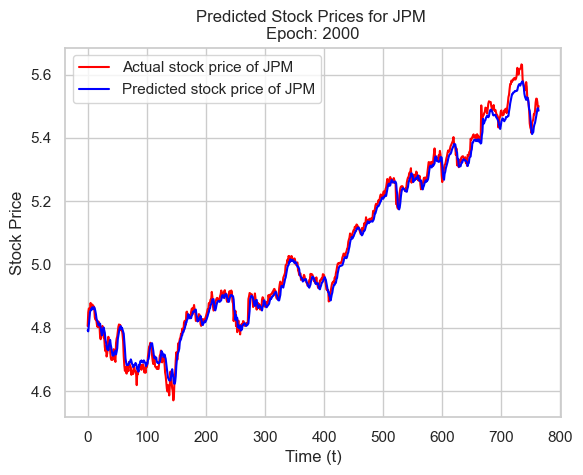

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the actual stock prices
plt.plot(np.arange(len(testY)), testY, color='red', label='Actual stock price of {}'.format(namasaham))

# Plotting the predicted stock prices
plt.plot(np.arange(len(predict_price)), predict_price, color='blue', label='Predicted stock price of {}'.format(namasaham))

# Adding title and labels to the plot
plt.title('Predicted Stock Prices for {} \nEpoch: 2000'.format(namasaham))  # Added epoch here
plt.xlabel('Time (t)')
plt.ylabel('Stock Price')

# Adding a legend to differentiate between actual and predicted prices
plt.legend()

# Saving the plot with high resolution (sharp image)
# plt.savefig('E:/Dokument/testing_predict_Rnn_6_{}.png'.format(namasaham), dpi=300, bbox_inches='tight')

# Displaying the plot
plt.show()
